# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_combined = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='outer')

# Display the data table for preview
study_data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [97]:
# Checking the number of mice.
number_of_mice = study_data_combined['Mouse ID'].nunique()
number_of_mice

249

In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_id = study_data_combined.loc[study_data_combined.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = study_data_combined.loc[study_data_combined['Mouse ID']== 'g989', :]
duplicated_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicated_mice = study_data_combined[study_data_combined['Mouse ID'].isin(duplicated_mice_id) == False]
no_duplicated_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Checking the number of mice in the clean DataFrame.
no_duplicated_df = no_duplicated_mice['Mouse ID'].nunique()
no_duplicated_df

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = no_duplicated_mice['Tumor Volume (mm3)'].groupby(no_duplicated_mice['Drug Regimen']).mean()
median = no_duplicated_mice['Tumor Volume (mm3)'].groupby(no_duplicated_mice['Drug Regimen']).median()
variance = no_duplicated_mice['Tumor Volume (mm3)'].groupby(no_duplicated_mice['Drug Regimen']).var()
standard_deviation = no_duplicated_mice['Tumor Volume (mm3)'].groupby(no_duplicated_mice['Drug Regimen']).std()
sem = no_duplicated_mice["Tumor Volume (mm3)"].groupby(no_duplicated_mice['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean,
                                   'Median Tumor Volume': median,
                                   'Tumor Volume Varience': variance,
                                   'Tumor Volume Standard Deviation': standard_deviation,
                                   'Tumor Volume SEM': sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation = no_duplicated_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median'])
summary_aggregation

Tumor Volume (mm3)           
                           mean     median
Drug Regimen                              
Capomulin             40.675741  41.557809
Ceftamin              52.591172  51.776157
Infubinol             52.884795  51.820584
Ketapril              55.235638  53.698743
Naftisol              54.331565  52.509285
Placebo               54.033581  52.288934
Propriva              52.320930  50.446266
Ramicane              40.216745  40.673236
Stelasyn              54.233149  52.431737
Zoniferol             53.236507  51.818479

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

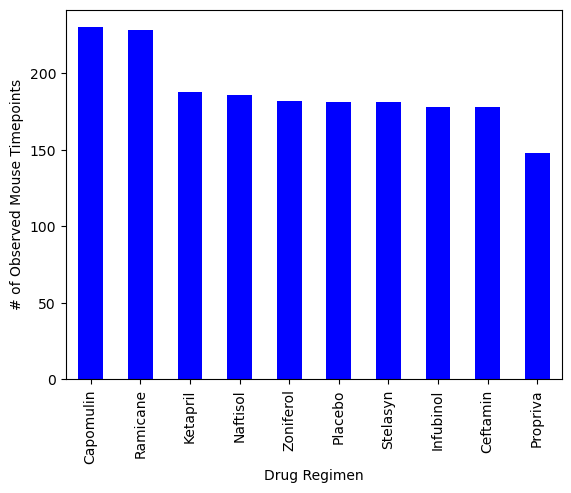

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
all_mice = no_duplicated_mice['Drug Regimen'].value_counts()

pandas_plot = all_mice.plot.bar(color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')




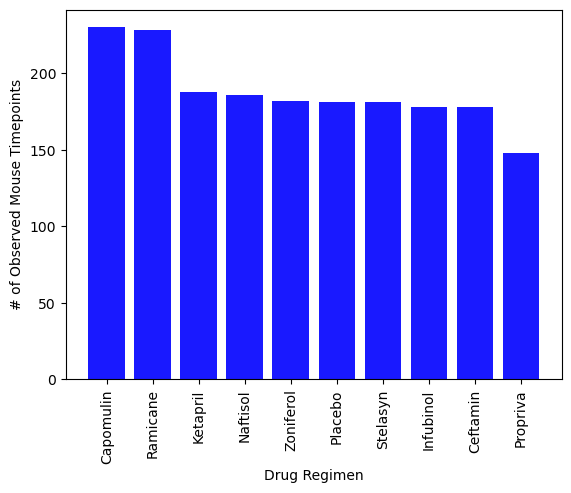

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = all_mice.index.values
y_axis = all_mice.values

plt.bar(x_axis, y_axis, color='b', alpha=0.9, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

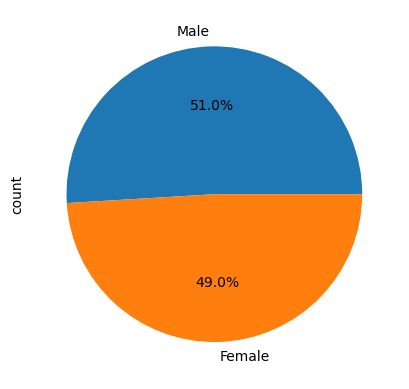

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = no_duplicated_mice['Sex'].value_counts()
mouse_sex.plot.pie(autopct= '%1.1f%%')
plt.show()

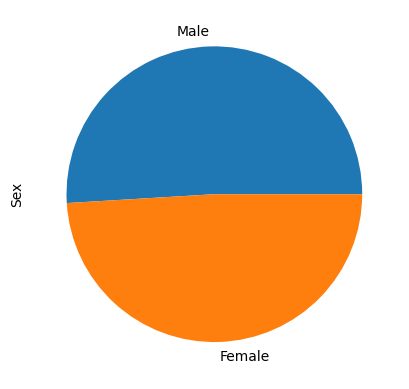

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = mouse_sex.plot.pie(y='Total Count', autopct="")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = no_duplicated_mice.loc[no_duplicated_mice['Drug Regimen'] == 'Capomulin', :]
ramicaine_df = no_duplicated_mice.loc[no_duplicated_mice['Drug Regimen'] == 'Ramicane', :]
infubinol_df = no_duplicated_mice.loc[no_duplicated_mice['Drug Regimen'] == 'Infubinol', :]
ceftamin_df = no_duplicated_mice.loc[no_duplicated_mice['Drug Regimen'] == 'Ceftamin', :]
                                    
# Start by getting the last (greatest) timepoint for each mouse
greatest_capomulin = capomulin_df.groupby('Mouse ID').max()['Timepoint']
volume_capomulin = pd.DataFrame(greatest_capomulin)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_capomulin = pd.merge(volume_capomulin, no_duplicated_mice, on=('Mouse ID', 'Timepoint'), how='left')
merge_capomulin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments = 0
for drug in list_of_drugs:
    

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


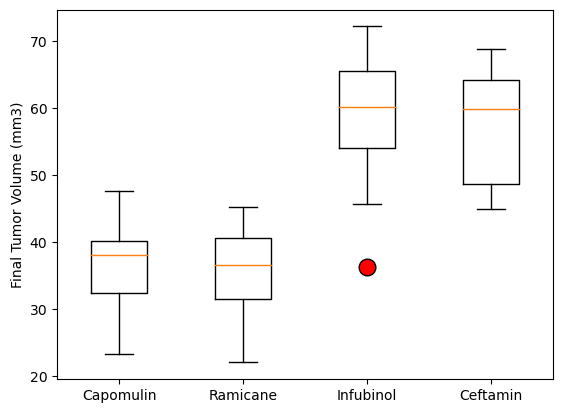

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

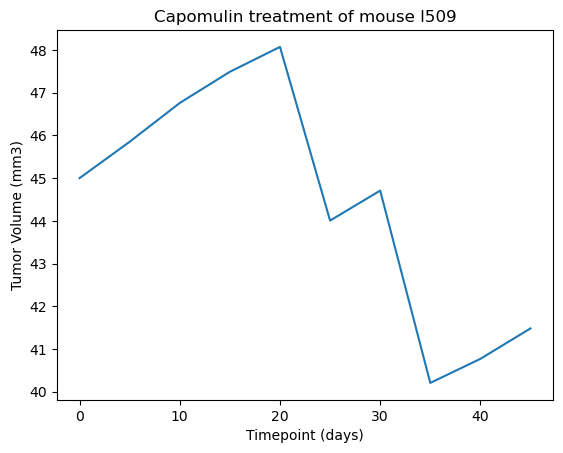

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


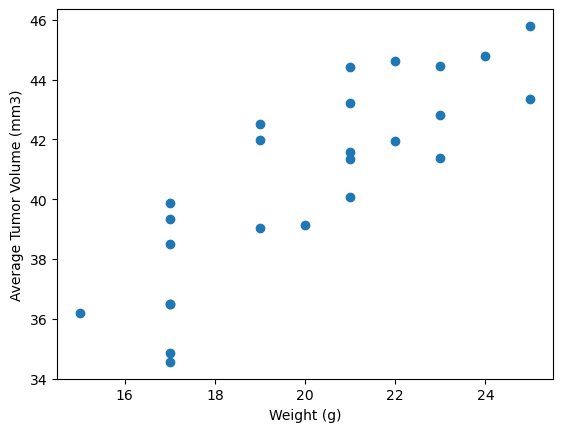

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


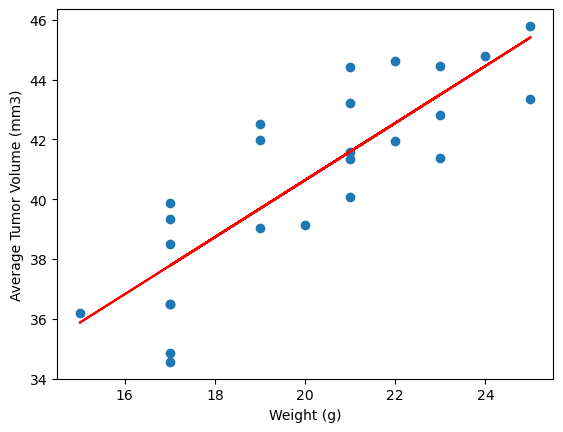

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
